In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
#check the numbers of rows and columns
df.shape

(10, 4)

In [4]:
df.isnull().values.any()

True

In [5]:
X = df.iloc[:, 1:3] #for input
X.head()

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN


In [6]:
y = df.iloc[:, 3:4] #for ouput or target or dependent
y.head()

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes


In [7]:
data = pd.concat([X,y], axis = 1)
data

,Age,Salary,Purchased
0,44.0,72000.0,No
1,27.0,48000.0,Yes
2,30.0,54000.0,No
3,38.0,61000.0,No
4,40.0,NaN,Yes
5,35.0,58000.0,Yes
6,NaN,52000.0,No
7,48.0,79000.0,Yes
8,50.0,83000.0,No
9,37.0,67000.0,Yes


In [8]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Salary'].fillna(data['Salary'].mean(), inplace=True)
data

,Age,Salary,Purchased
0,44.000000,72000.000000,No
1,27.000000,48000.000000,Yes
2,30.000000,54000.000000,No
3,38.000000,61000.000000,No
4,40.000000,63777.777778,Yes
5,35.000000,58000.000000,Yes
6,38.777778,52000.000000,No
7,48.000000,79000.000000,Yes
8,50.000000,83000.000000,No
9,37.000000,67000.000000,Yes


In [9]:
new_features = data.iloc[:, 0:2]
new_features

,Age,Salary
0,44.000000,72000.000000
1,27.000000,48000.000000
2,30.000000,54000.000000
3,38.000000,61000.000000
4,40.000000,63777.777778
5,35.000000,58000.000000
6,38.777778,52000.000000
7,48.000000,79000.000000
8,50.000000,83000.000000
9,37.000000,67000.000000


In [10]:
label = data.iloc[:, 2:3]
label

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Purchased'] = le.fit_transform(data['Purchased'])
data

,Age,Salary,Purchased
0,44.000000,72000.000000,0
1,27.000000,48000.000000,1
2,30.000000,54000.000000,0
3,38.000000,61000.000000,0
4,40.000000,63777.777778,1
5,35.000000,58000.000000,1
6,38.777778,52000.000000,0
7,48.000000,79000.000000,1
8,50.000000,83000.000000,0
9,37.000000,67000.000000,1


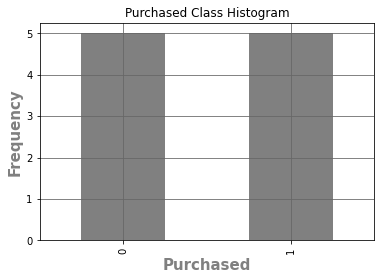

In [12]:
classes_count = pd.value_counts(data['Purchased'], sort=True).sort_index()
classes_count.plot(kind='bar', color='gray')
plt.title('Purchased Class Histogram')
plt.xlabel('Purchased', fontweight='bold', fontsize='15', color='gray')
plt.ylabel('Frequency', fontweight='bold', fontsize='15', color='gray')
plt.grid(which='major', b=True, color='#666666', linestyle='-')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['normalized_age'] = scaler.fit_transform(data['Age'].values.reshape(-1,1))
data['normalized_salary'] = scaler.fit_transform(data['Salary'].values.reshape(-1,1))

In [14]:
data = data.drop(['Age','Salary'], axis=1)
data

,Purchased,normalized_age,normalized_salary
0,0,0.758874,7.494733e-01
1,1,-1.711504,-1.438178e+00
2,0,-1.275555,-8.912655e-01
3,0,-0.113024,-2.532004e-01
4,1,0.177609,6.632192e-16
5,1,-0.548973,-5.266569e-01
6,0,0.000000,-1.073570e+00
7,1,1.340140,1.387538e+00
8,0,1.630773,1.752147e+00
9,1,-0.258340,2.937125e-01


In [15]:
xData = data.iloc[:, data.columns != 'Purchased']
xData.head()

,normalized_age,normalized_salary
0,0.758874,7.494733e-01
1,-1.711504,-1.438178e+00
2,-1.275555,-8.912655e-01
3,-0.113024,-2.532004e-01
4,0.177609,6.632192e-16


In [16]:
yData = data.iloc[:, data.columns == 'Purchased']
yData.head()

,Purchased
0,0
1,1
2,0
3,0
4,1


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(xData, yData, test_size=0.4, random_state=587)

In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_train.shape)
print("y_train shape:", X_train.shape)
print("y_test shape:", X_train.shape)

X_train shape: (6, 2)
X_test shape: (6, 2)
y_train shape: (6, 2)
y_test shape: (6, 2)


In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

c:\users\dell\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [26]:
model.score(X_test, y_test)

0.75

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_pred, y_test)
cm

array([[2, 1],
       [0, 1]], dtype=int64)

In [ ]:
print(classification)